Capstone



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pip install google-api-python-client

In [3]:
import numpy as np
import pandas as pd
import string

import re
import time

import seaborn as sns
import matplotlib.pyplot as plt


import requests
from bs4 import BeautifulSoup as bs

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import plotly.graph_objects as go

import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import sys


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer


# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import cufflinks as cf
cf.go_offline()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import googleapiclient.discovery

# Make sure to input your specialized Youtube API into the XXXXXXXX line
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "XXXXXXXX"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

In [5]:
# Collecting a maximum of 400 comments from Youtube videos
def comment_collector(vid):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId= vid,
        maxResults=400
    )

    response = request.execute()

    comments = []


    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

    return df

In [6]:
# Creating list of 6 videos per natural disaster

vid_earthquake = ['zWZyjqzUg3A','ULqvdsyMr9g','pMMNgZnsrtw','9FpdwS1c11E','N7BAXfvMtck','5HiMrZG7OVM']


vid_flood = ['3u7vdho1qIo','ozqGvyTWeAg','8A65JzDltY4','ZJO6x2jkGoM','zj2PWkBmJEQ','7pjuDO6lEWU']


vid_wildfire = ['KASbSCqpDdw','zK3TbiI6qmQ','blr1OAHQAKE','tJGs96eiw4A','nDvzobsS_oI','LMPRP2BhLkA']


vid_storm = ['qkx048nSeEE','hZ3qOte7Pxk','iwIK7Hsgxc0','eWkXvbAKWF0','nnJsOB-K9QI','LRuF1l5SU84']

In [7]:
# Creating a dataframe for earthquake
list_df_earth = []
for vid in vid_earthquake:
    comment_collector(vid)
    df = comment_collector(vid)
    list_df_earth.append(df)


df_earth = pd.concat(list_df_earth)
df_earth = df_earth.reset_index(drop=True)
df_earth['Type'] = 1
df_earth.head()

author          published_at            updated_at  \
0  Duwag at Bobo PINOY  2023-07-03T07:33:08Z  2023-07-03T07:33:08Z   
1            Cameraman  2023-06-15T02:28:43Z  2023-06-15T02:28:43Z   
2         Grace Palmer  2023-04-04T13:50:52Z  2023-04-04T13:50:52Z   
3            honey bee  2023-02-10T14:22:53Z  2023-02-10T14:22:53Z   
4                 FB R  2022-12-18T17:58:30Z  2022-12-18T17:58:30Z   

   like_count                                               text  Type  
0           1                                              KARMA     1  
1           0                       Oh no I&#39;m in Philippines     1  
2           0                                              Pray!     1  
3           0  That was happen in my province.. we are far fr...     1  
4           1  Pa shout out raissa robles journalist shop lif...     1

In [8]:
# Creating a dataframe for flood
list_df_flood = []
for vid in vid_flood:
    comment_collector(vid)
    df = comment_collector(vid)
    list_df_flood.append(df)


df_flood = pd.concat(list_df_flood)
df_flood = df_flood.reset_index(drop=True)
df_flood['Type'] = 2
df_flood.head()

author          published_at            updated_at  like_count  \
0              Karri  2023-08-29T22:04:56Z  2023-08-29T22:04:56Z           0   
1       Bill Stevens  2023-08-26T01:48:30Z  2023-08-26T01:48:30Z           0   
2         Bear Bones  2023-08-26T00:56:45Z  2023-08-26T00:56:45Z           0   
3  Nathaniel Peekab👀  2023-08-25T21:53:15Z  2023-08-25T21:53:15Z           1   
4  Nathaniel Peekab👀  2023-08-25T21:52:13Z  2023-08-25T21:52:13Z           1   

                                                text  Type  
0                                          😂😂😂😂😮😢😮😮😮     2  
1  I never see Trump helping poor people.  It fem...     2  
2  Guess u got what u deserved. Narratives  u pro...     2  
3  👀ACTS🎬 2 :2<br>And suddenly😳there came<br> a~🎺...     2  
4  💜~👂heard the 💫 Angeles 💫<br>    ~🎶~🎵 singing 🎶...     2

In [9]:
# Creating a dataframe for wildfire
list_df_fire = []
for vid in vid_wildfire:
    comment_collector(vid)
    df = comment_collector(vid)
    list_df_fire.append(df)


df_wildfire = pd.concat(list_df_fire)
df_wildfire = df_wildfire.reset_index(drop=True)
df_wildfire['Type'] = 3
df_wildfire.head()

author          published_at            updated_at  \
0       Charlie Staats  2023-07-27T15:32:01Z  2023-07-27T15:32:01Z   
1  A Dude For Humanity  2023-07-20T01:27:49Z  2023-07-20T01:27:49Z   
2        Maryann Riebe  2023-07-16T18:47:23Z  2023-07-16T18:47:23Z   
3         Lowell Hubbs  2023-07-15T20:05:40Z  2023-07-15T20:05:40Z   
4       Lawrence Boose  2023-06-28T21:01:02Z  2023-06-28T21:01:02Z   

   like_count                                               text  Type  
0           1  Let me ask you readers a question. If these sm...     3  
1           0  Watching this the air quality is clear in area...     3  
2           0                              You mean  Chem trails     3  
3           0  So then why not analyze directly what is actua...     3  
4           1  It&#39;s here in St Louis Missouri this is get...     3

In [10]:
# Creating a dataframe for storm
list_df_storm = []
for vid in vid_storm:
    comment_collector(vid)
    df = comment_collector(vid)
    list_df_storm.append(df)


df_storm = pd.concat(list_df_storm)
df_storm = df_storm.reset_index(drop=True)
df_storm['Type'] = 4
df_storm.head()

author          published_at            updated_at  like_count  \
0  Something Clever  2023-07-06T22:43:12Z  2023-07-06T22:43:12Z           0   
1  Fkthe Demlibscum  2022-11-10T01:13:03Z  2022-11-10T01:13:03Z           0   
2    mda Marco Teoh  2022-10-21T22:14:58Z  2022-10-21T22:14:58Z           0   
3        BantheKids  2022-10-17T00:46:11Z  2022-10-17T00:46:11Z           0   
4        Alex To go  2022-10-15T18:06:56Z  2022-10-15T18:06:56Z           0   

                                                text  Type  
0  What a drama queen! I was in Venice throughout...     4  
1     I hope no Republicans were harmed or affected.     4  
2                       CNN fake news strike again 😂     4  
3                 CNN is the Liberal&#39;s Fox News.     4  
4  what  bullsht news. the guy casually walking t...     4

In [11]:
# Combining our dataframe into one.
list_df = [df_storm,df_earth,df_wildfire,df_flood]
df_disaster = pd.concat(list_df)
df_disaster = df_disaster.reset_index(drop=True)
df_disaster.head()

author          published_at            updated_at  like_count  \
0  Something Clever  2023-07-06T22:43:12Z  2023-07-06T22:43:12Z           0   
1  Fkthe Demlibscum  2022-11-10T01:13:03Z  2022-11-10T01:13:03Z           0   
2    mda Marco Teoh  2022-10-21T22:14:58Z  2022-10-21T22:14:58Z           0   
3        BantheKids  2022-10-17T00:46:11Z  2022-10-17T00:46:11Z           0   
4        Alex To go  2022-10-15T18:06:56Z  2022-10-15T18:06:56Z           0   

                                                text  Type  
0  What a drama queen! I was in Venice throughout...     4  
1     I hope no Republicans were harmed or affected.     4  
2                       CNN fake news strike again 😂     4  
3                 CNN is the Liberal&#39;s Fox News.     4  
4  what  bullsht news. the guy casually walking t...     4

In [12]:
df_text = df_disaster.drop(['author','published_at','updated_at','like_count'], axis=1)
df_text.head()

text  Type
0  What a drama queen! I was in Venice throughout...     4
1     I hope no Republicans were harmed or affected.     4
2                       CNN fake news strike again 😂     4
3                 CNN is the Liberal&#39;s Fox News.     4
4  what  bullsht news. the guy casually walking t...     4

In [13]:
# Creating a list of non-natural disaster news
random_vid = ['7Blpe-z0nDE','XprAxbKFRjM','sQiP00DzEyI','oq6ZM015pE4','gmpA0JLm1QQ','RwAbJYmcbMA','xg-CCNewRsw',
              'LMBdD-1g0fg','ixOWR9_PSxg','HqC5atau1ik','rd_0zSlX5XM','FbuBrfxN8G0','QU5u5GQzWJ4','79-TzZcpVmM']

# Creating a dataframe from our list of videos
list_df_rand = []
for vid in random_vid:
    comment_collector(vid)
    df = comment_collector(vid)
    list_df_rand.append(df)


df_rand = pd.concat(list_df_rand)
df_rand = df_rand.reset_index(drop=True)
df_rand['Type'] = 0
df_rand = df_rand.drop(['author','published_at','updated_at','like_count'], axis=1)
df_rand.head()

text  Type
0                He had a chance to overthrow Putin.     0
1  We now hear talks about Bush &amp; Blair are  ...     0
2        He was shitting his pants for a whole hour😂     0
3                                     Likely excited     0
4  After Putin saw a video of Pregozhin stating  ...     0

In [14]:
# Adding htps and br
STOPWORDS.add('https')
STOPWORDS.add('br')
# Adding list of all single letters
list_letters = set(string.ascii_lowercase)
STOPWORDS = STOPWORDS.union(list_letters)


# Creating a worldcloud function
def Plot_world(text):

    comment_words = ' '
    stopwords = set(STOPWORDS)

    for val in text:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 1000, height = 1000,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

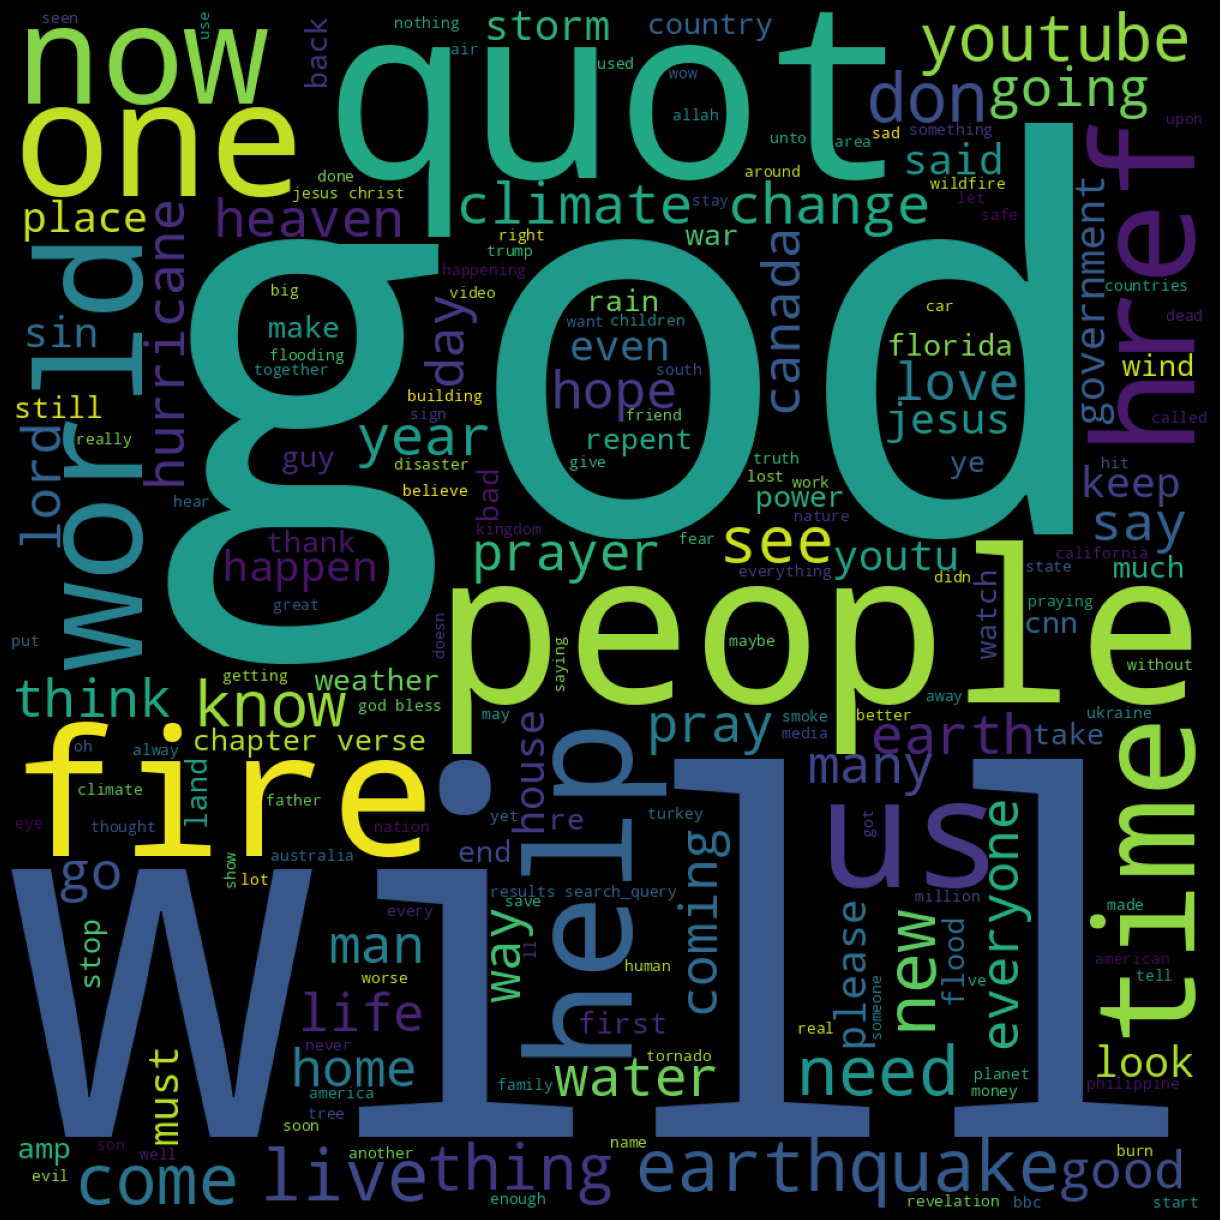

In [15]:
# Creating wordcloud from our raw data of natural disaster
Plot_world(df_disaster['text'].values)

In [16]:
# Creating function to remove emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [17]:
# Applying the function to our two dataframes
df_text['text']= df_text['text'].apply(lambda x:remove_emojis(x))
df_rand['text']= df_rand['text'].apply(lambda x:remove_emojis(x))
df_text.head()

text  Type
0  What a drama queen! I was in Venice throughout...     4
1     I hope no Republicans were harmed or affected.     4
2                        CNN fake news strike again      4
3                 CNN is the Liberal&#39;s Fox News.     4
4  what  bullsht news. the guy casually walking t...     4

In [18]:
# Changing to lowercase
df_text['text']= df_text['text'].apply(lambda x: x.lower())
df_rand['text']= df_rand['text'].apply(lambda x: x.lower())
df_text.head()

text  Type
0  what a drama queen! i was in venice throughout...     4
1     i hope no republicans were harmed or affected.     4
2                        cnn fake news strike again      4
3                 cnn is the liberal&#39;s fox news.     4
4  what  bullsht news. the guy casually walking t...     4

In [19]:
# Removing digits and brackets from data
df_text['text'] = df_text['text'].str.replace('\\d+', '', regex=True)
df_text['text'] = df_text['text'].str.replace(r'\\(|\\)', '', regex=True)

df_rand['text'] = df_rand['text'].str.replace('\\d+', '', regex=True)
df_rand['text'] = df_rand['text'].str.replace(r'\\(|\\)', '', regex=True)

In [20]:
df_text.head()

text  Type
0  what a drama queen! i was in venice throughout...     4
1     i hope no republicans were harmed or affected.     4
2                        cnn fake news strike again      4
3                   cnn is the liberal&#;s fox news.     4
4  what  bullsht news. the guy casually walking t...     4

In [21]:
# Creating a function for removing any punctuation
string.punctuation
def remove_punctuation(text):
    punctuationfree= "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [22]:
# Applying the removing punctuation
df_text['text']= df_text['text'].apply(lambda x:remove_punctuation(x))
df_rand['text']= df_rand['text'].apply(lambda x:remove_punctuation(x))
df_text['text'].head()

0    what a drama queen i was in venice throughout ...
1        i hope no republicans were harmed or affected
2                          cnn fake news strike again 
3                         cnn is the liberals fox news
4    what  bullsht news the guy casually walking to...
Name: text, dtype: object

In [23]:
# Importing stopwords
# list of common words such as the, an, a, in, etc...
# since these words do not hold any importance or should not be given any weight
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
# adding https, http, br as well as single letters
stopwords.append('https')
stopwords.append('http')
stopwords.append('br')
single_letters = list(string.ascii_lowercase)
stopwords = stopwords + (single_letters)

In [24]:
# Creating the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [25]:
# Applying the function
df_text['text cleaned']= df_text['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_rand['text cleaned']= df_rand['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_text.head()

text  Type  \
0  what a drama queen i was in venice throughout ...     4   
1      i hope no republicans were harmed or affected     4   
2                        cnn fake news strike again      4   
3                       cnn is the liberals fox news     4   
4  what  bullsht news the guy casually walking to...     4   

                                        text cleaned  
0  drama queen venice throughout storm glad power...  
1                   hope republicans harmed affected  
2                               cnn fake news strike  
3                              cnn liberals fox news  
4  bullsht news guy casually walking car inthe ba...

In [26]:
# Creating function for splitting into a list format
def words_to_list(text):
    tokens = re.split(r'\\W+',text)
    return tokens

In [27]:
# Applying the function to all the rows
df_text['text list']= df_text['text cleaned'].apply(lambda x: words_to_list(x))
df_rand['text list']= df_rand['text cleaned'].apply(lambda x: words_to_list(x))

df_text.head()

text  Type  \
0  what a drama queen i was in venice throughout ...     4   
1      i hope no republicans were harmed or affected     4   
2                        cnn fake news strike again      4   
3                       cnn is the liberals fox news     4   
4  what  bullsht news the guy casually walking to...     4   

                                        text cleaned  \
0  drama queen venice throughout storm glad power...   
1                   hope republicans harmed affected   
2                               cnn fake news strike   
3                              cnn liberals fox news   
4  bullsht news guy casually walking car inthe ba...   

                                           text list  
0  [drama queen venice throughout storm glad powe...  
1                 [hope republicans harmed affected]  
2                             [cnn fake news strike]  
3                            [cnn liberals fox news]  
4  [bullsht news guy casually walking car inthe b...

In [28]:
# Importing PorterStemmer
# This will reduce words into their common base
# Ex: [big, bigger , biggest]  will give us  [big , big, big]

from nltk.stem.porter import PorterStemmer
# Stating the object for stemming
porter_stemmer = PorterStemmer()

In [29]:
# Creating the function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

In [30]:
# Applying the function
df_text['text stemmed']= df_text['text list'].apply(lambda x: stemming(x))
df_rand['text stemmed']= df_rand['text list'].apply(lambda x: stemming(x))
df_text.head()

text  Type  \
0  what a drama queen i was in venice throughout ...     4   
1      i hope no republicans were harmed or affected     4   
2                        cnn fake news strike again      4   
3                       cnn is the liberals fox news     4   
4  what  bullsht news the guy casually walking to...     4   

                                        text cleaned  \
0  drama queen venice throughout storm glad power...   
1                   hope republicans harmed affected   
2                               cnn fake news strike   
3                              cnn liberals fox news   
4  bullsht news guy casually walking car inthe ba...   

                                           text list  \
0  [drama queen venice throughout storm glad powe...   
1                 [hope republicans harmed affected]   
2                             [cnn fake news strike]   
3                            [cnn liberals fox news]   
4  [bullsht news guy casually walking car inthe b...   

                                        text stemmed  
0  [drama queen venice throughout storm glad powe...  
1                   [hope republicans harmed affect]  
2                              [cnn fake news strik]  
3                             [cnn liberals fox new]  
4  [bullsht news guy casually walking car inthe b...

In [31]:
# Stating the command Lemmatization
# It is a mix of Stemming and Lemmatization
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
# Creating the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [33]:
# Applying the function
df_text['text Lemmatized']= df_text['text stemmed'].apply(lambda x:lemmatizer(x))
df_rand['text Lemmatized']= df_rand['text stemmed'].apply(lambda x:lemmatizer(x))
df_text.head()

text  Type  \
0  what a drama queen i was in venice throughout ...     4   
1      i hope no republicans were harmed or affected     4   
2                        cnn fake news strike again      4   
3                       cnn is the liberals fox news     4   
4  what  bullsht news the guy casually walking to...     4   

                                        text cleaned  \
0  drama queen venice throughout storm glad power...   
1                   hope republicans harmed affected   
2                               cnn fake news strike   
3                              cnn liberals fox news   
4  bullsht news guy casually walking car inthe ba...   

                                           text list  \
0  [drama queen venice throughout storm glad powe...   
1                 [hope republicans harmed affected]   
2                             [cnn fake news strike]   
3                            [cnn liberals fox news]   
4  [bullsht news guy casually walking car inthe b...   

                                        text stemmed  \
0  [drama queen venice throughout storm glad powe...   
1                   [hope republicans harmed affect]   
2                              [cnn fake news strik]   
3                             [cnn liberals fox new]   
4  [bullsht news guy casually walking car inthe b...   

                                     text Lemmatized  
0  [drama queen venice throughout storm glad powe...  
1                   [hope republicans harmed affect]  
2                              [cnn fake news strik]  
3                             [cnn liberals fox new]  
4  [bullsht news guy casually walking car inthe b...

In [34]:
# Removing the list
df_text['text finalized']= df_text['text Lemmatized'].apply(" ".join)
df_rand['text finalized']= df_rand['text Lemmatized'].apply(" ".join)

In [35]:
df_text.head()

text  Type  \
0  what a drama queen i was in venice throughout ...     4   
1      i hope no republicans were harmed or affected     4   
2                        cnn fake news strike again      4   
3                       cnn is the liberals fox news     4   
4  what  bullsht news the guy casually walking to...     4   

                                        text cleaned  \
0  drama queen venice throughout storm glad power...   
1                   hope republicans harmed affected   
2                               cnn fake news strike   
3                              cnn liberals fox news   
4  bullsht news guy casually walking car inthe ba...   

                                           text list  \
0  [drama queen venice throughout storm glad powe...   
1                 [hope republicans harmed affected]   
2                             [cnn fake news strike]   
3                            [cnn liberals fox news]   
4  [bullsht news guy casually walking car inthe b...   

                                        text stemmed  \
0  [drama queen venice throughout storm glad powe...   
1                   [hope republicans harmed affect]   
2                              [cnn fake news strik]   
3                             [cnn liberals fox new]   
4  [bullsht news guy casually walking car inthe b...   

                                     text Lemmatized  \
0  [drama queen venice throughout storm glad powe...   
1                   [hope republicans harmed affect]   
2                              [cnn fake news strik]   
3                             [cnn liberals fox new]   
4  [bullsht news guy casually walking car inthe b...   

                                      text finalized  
0  drama queen venice throughout storm glad power...  
1                     hope republicans harmed affect  
2                                cnn fake news strik  
3                               cnn liberals fox new  
4  bullsht news guy casually walking car inthe ba...

In [36]:
# Checking to see if there is any difference after our cleaning
df_text["Length of text"] = df_text["text"].apply(lambda n: len(n))
df_rand["Length of text finalized"] = df_rand["text finalized"].apply(lambda n: len(n))

# Viewing to see the changes
df_text.head()

text  Type  \
0  what a drama queen i was in venice throughout ...     4   
1      i hope no republicans were harmed or affected     4   
2                        cnn fake news strike again      4   
3                       cnn is the liberals fox news     4   
4  what  bullsht news the guy casually walking to...     4   

                                        text cleaned  \
0  drama queen venice throughout storm glad power...   
1                   hope republicans harmed affected   
2                               cnn fake news strike   
3                              cnn liberals fox news   
4  bullsht news guy casually walking car inthe ba...   

                                           text list  \
0  [drama queen venice throughout storm glad powe...   
1                 [hope republicans harmed affected]   
2                             [cnn fake news strike]   
3                            [cnn liberals fox news]   
4  [bullsht news guy casually walking car inthe b...   

                                        text stemmed  \
0  [drama queen venice throughout storm glad powe...   
1                   [hope republicans harmed affect]   
2                              [cnn fake news strik]   
3                             [cnn liberals fox new]   
4  [bullsht news guy casually walking car inthe b...   

                                     text Lemmatized  \
0  [drama queen venice throughout storm glad powe...   
1                   [hope republicans harmed affect]   
2                              [cnn fake news strik]   
3                             [cnn liberals fox new]   
4  [bullsht news guy casually walking car inthe b...   

                                      text finalized  Length of text  
0  drama queen venice throughout storm glad power...             291  
1                     hope republicans harmed affect              45  
2                                cnn fake news strik              27  
3                               cnn liberals fox new              28  
4  bullsht news guy casually walking car inthe ba...              98

In [37]:
# Creating a new dataframe with the columns we want to test
df_text_final = df_text[['text finalized','Type']]
df_rand_final = df_rand[['text finalized','Type']]
df_text_final.head()

text finalized  Type
0  drama queen venice throughout storm glad power...     4
1                     hope republicans harmed affect     4
2                                cnn fake news strik     4
3                               cnn liberals fox new     4
4  bullsht news guy casually walking car inthe ba...     4

In [38]:
print("Here is our cleaned youtube natural disaster comments")
df_text_final

Here is our cleaned youtube natural disaster comments


text finalized  Type
0     drama queen venice throughout storm glad power...     4
1                        hope republicans harmed affect     4
2                                   cnn fake news strik     4
3                                  cnn liberals fox new     4
4     bullsht news guy casually walking car inthe ba...     4
...                                                 ...   ...
2215  awful news hope things get better pepeol got a...     2
2216                              may allah save us pan     2
2217                        hoping praying potoroos saf     2
2218                                floodbr tears covid     2
2219            best wishes australians hope recover ok     2

[2220 rows x 2 columns]

In [39]:
print("Here is our cleaned youtube regular news comments")
df_rand_final

Here is our cleaned youtube regular news comments


text finalized  Type
0                                chance overthrow putin     0
1     hear talks bush amp blair charged credit goes ...     0
2                             shitting pants whole hour     0
3                                          likely excit     0
4     putin saw video pregozhin stating brquot new r...     0
...                                                 ...   ...
1392   sad see quotmostly peacefulquot coup taking plac     0
1393                                       arrange fast     0
1394                     send russia destroying everyth     0
1395  means europe cannot take emigrants happy doesn...     0
1396                              populationrace replac     0

[1397 rows x 2 columns]

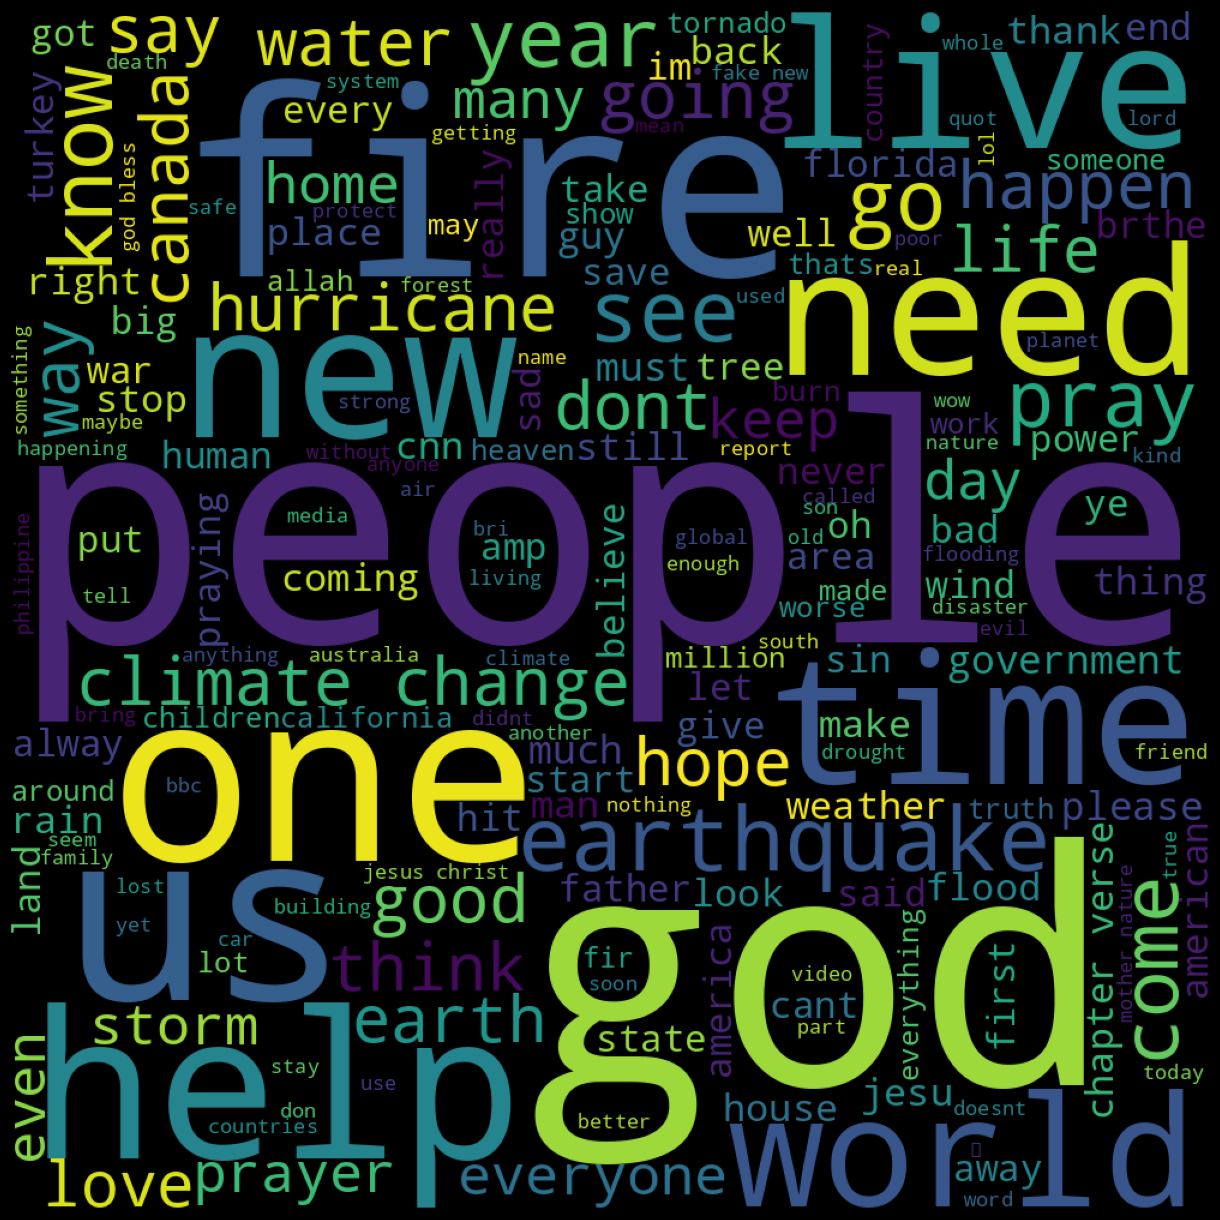

In [40]:
# Creating wordcloud from our cleaned natural disaster dataframe
Plot_world(df_text_final['text finalized'].values)

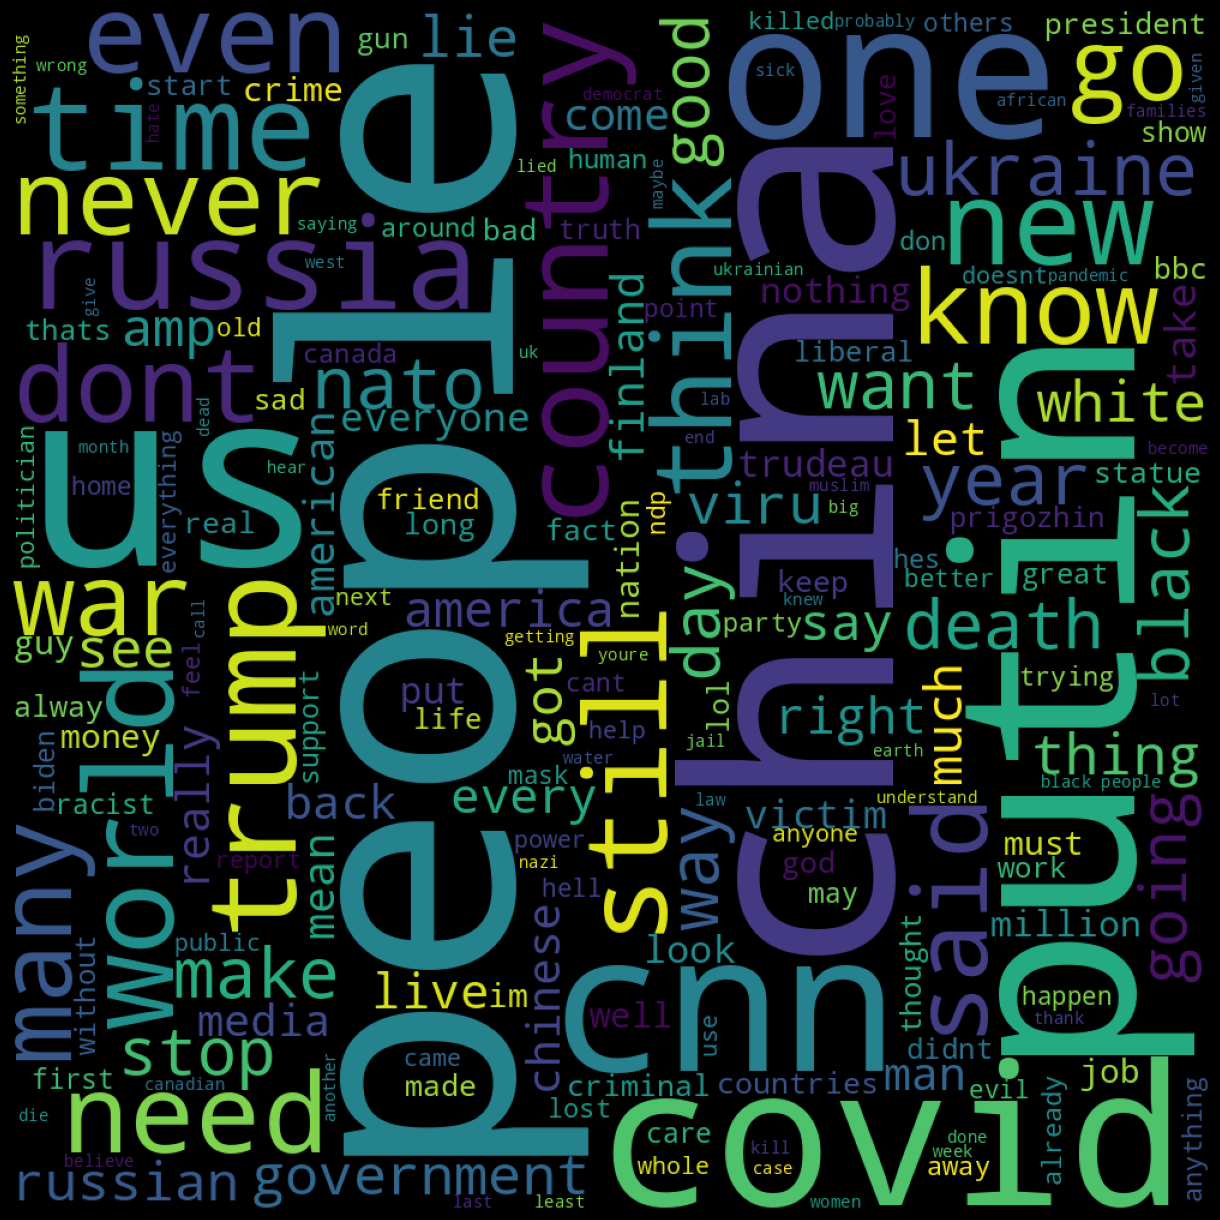

In [41]:
# Creating wordcloud from our cleaned regular news dataframe
Plot_world(df_rand_final['text finalized'].values)

In [42]:
# Getting our specific natural disaster dataframe
# we will create a wordcloud just for them
df_earthquake_final = df_text_final.loc[df_text_final['Type'] == 1]
df_storm_final = df_text_final.loc[df_text_final['Type'] == 2]
df_wildfire_final = df_text_final.loc[df_text_final['Type'] == 3]
df_flood_final = df_text_final.loc[df_text_final['Type'] == 4]

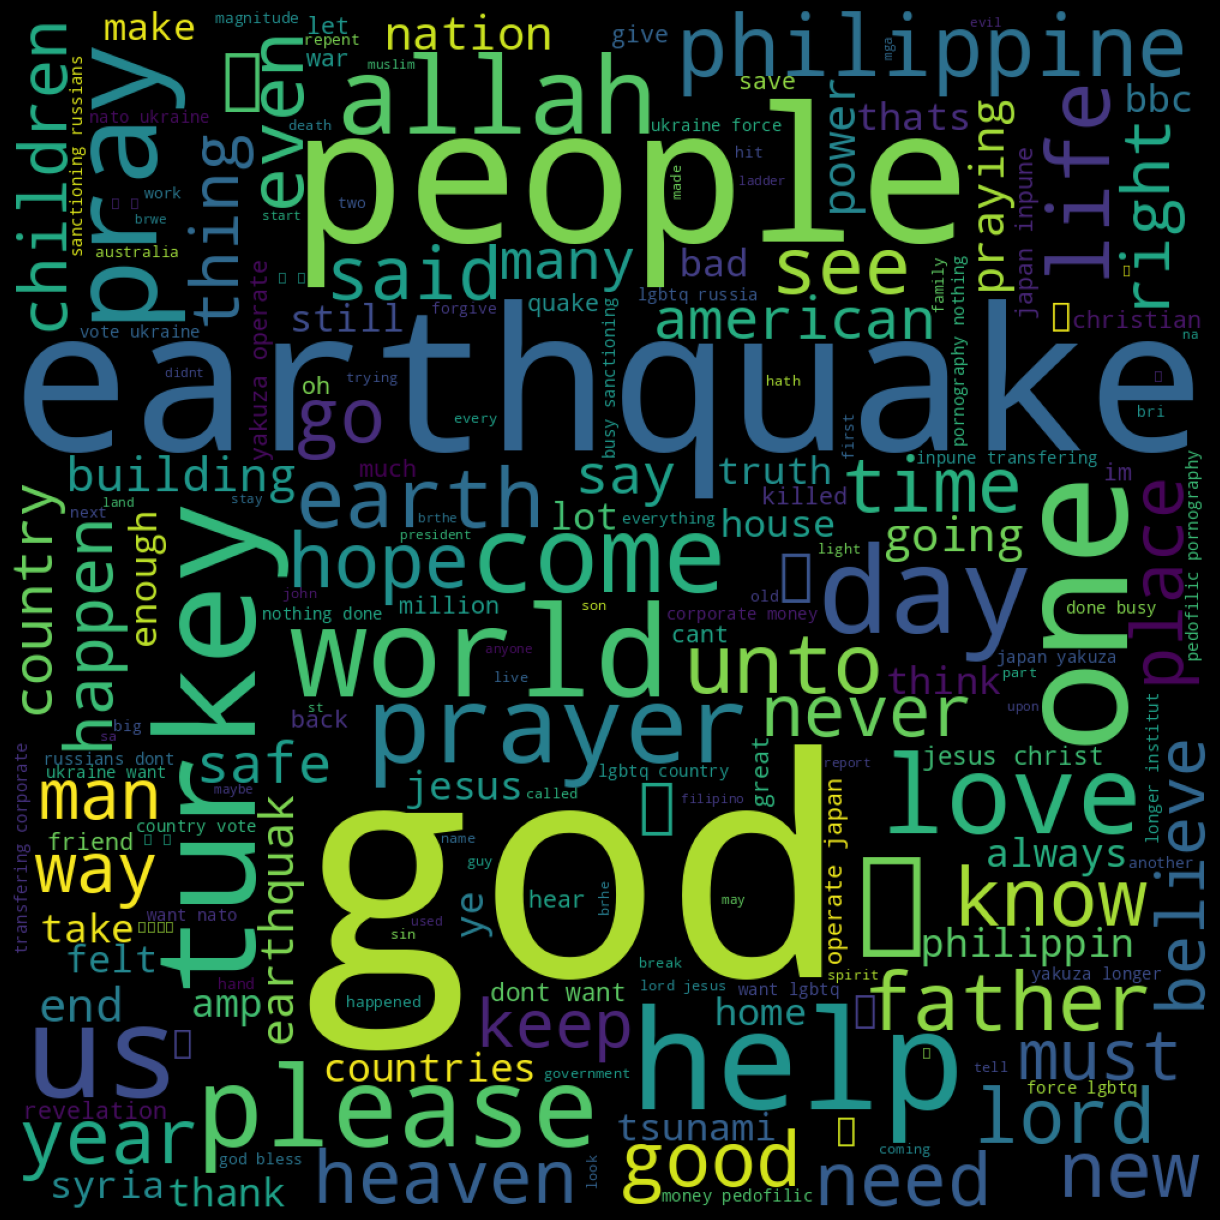

In [43]:
# Creating wordcloud for earthquake
Plot_world(df_earthquake_final['text finalized'].values)

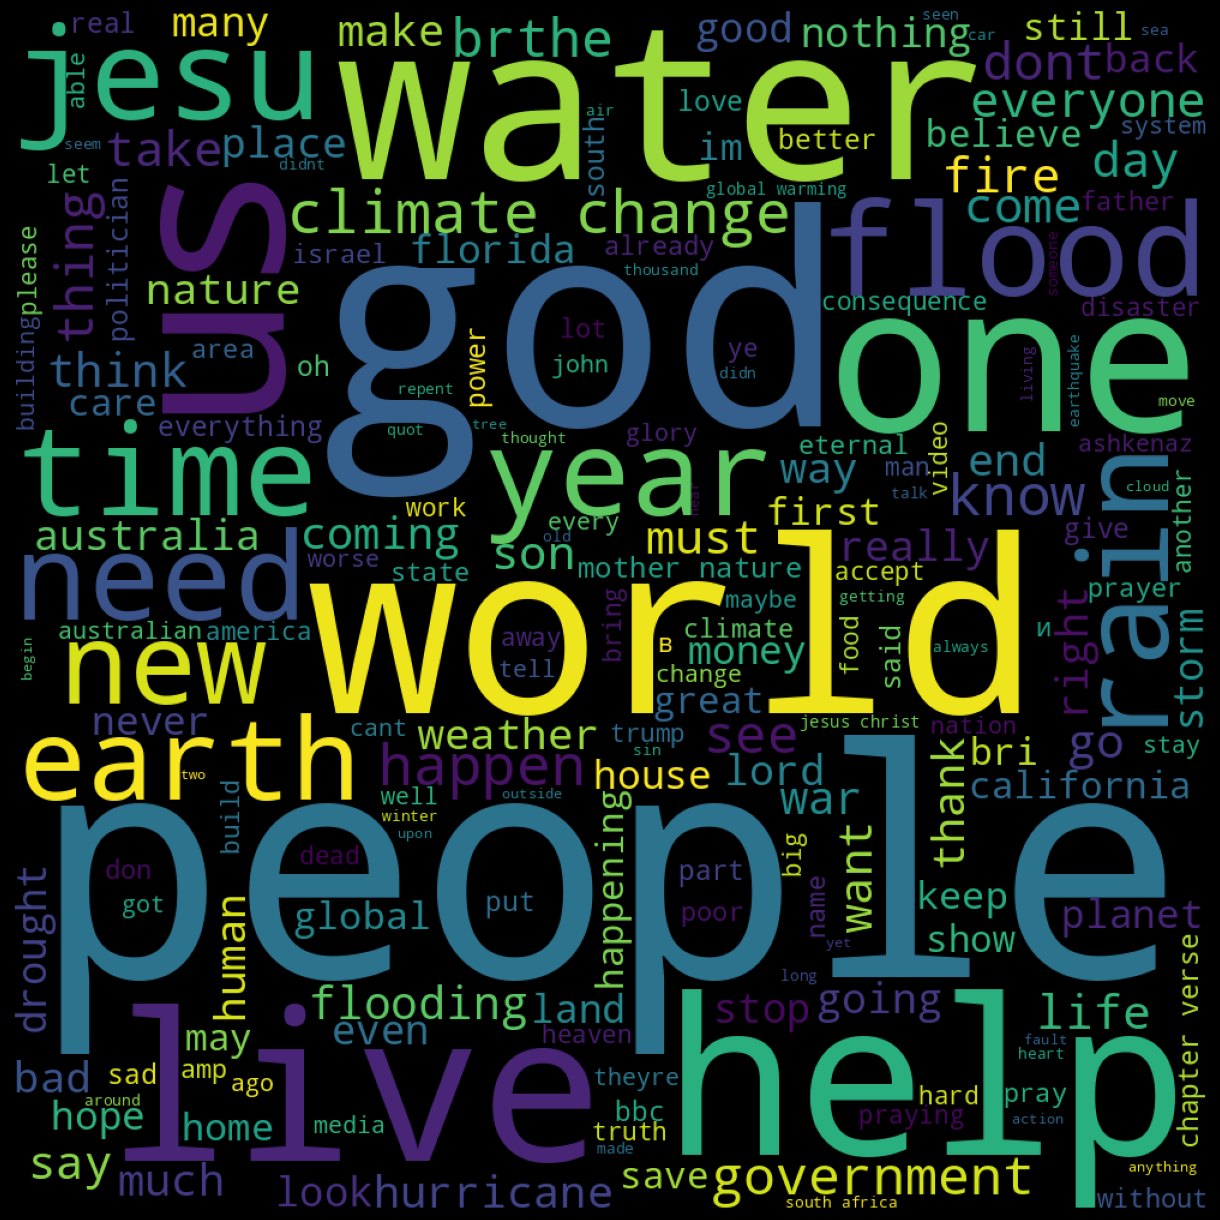

In [44]:
# Creating wordcloud for storm
Plot_world(df_storm_final['text finalized'].values)

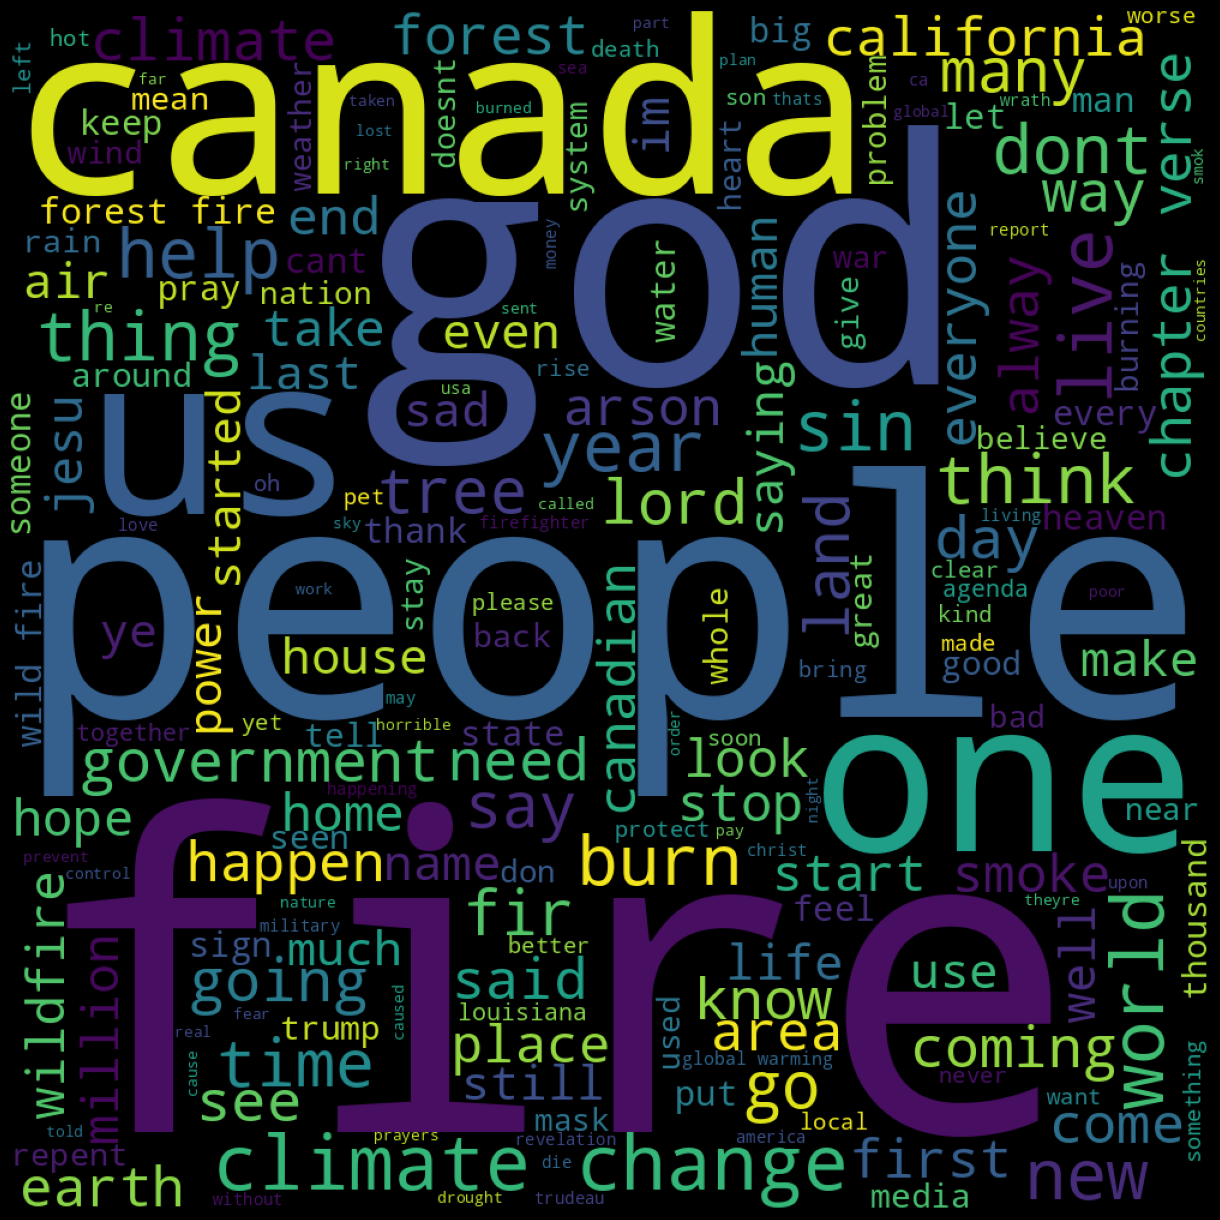

In [45]:
# Creating wordcloud for wildfire
Plot_world(df_wildfire_final['text finalized'].values)

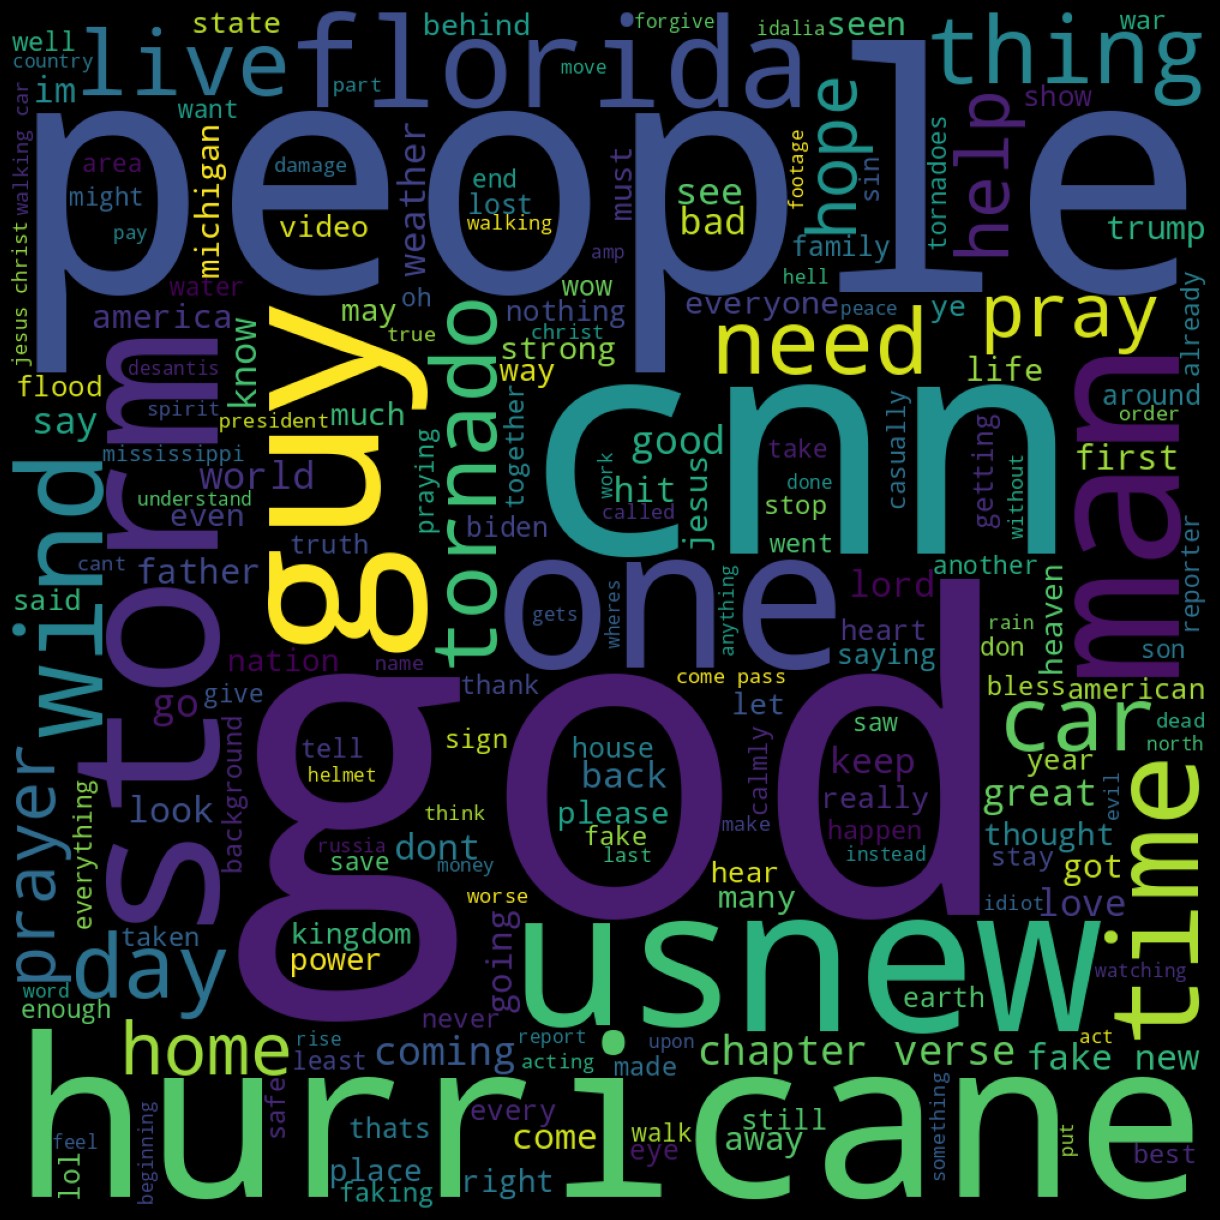

In [46]:
# Creating wordcloud for flood
Plot_world(df_flood_final['text finalized'].values)

In [47]:
# Getting the top 25 most frequent words from the natural disaster
from collections import Counter
Counter(" ".join(df_text_final["text finalized"]).split()).most_common(25)

[('god', 330),
 ('people', 297),
 ('shall', 176),
 ('us', 168),
 ('like', 165),
 ('one', 162),
 ('world', 149),
 ('help', 133),
 ('jesus', 121),
 ('climate', 114),
 ('fire', 109),
 ('get', 108),
 ('dont', 97),
 ('time', 95),
 ('fires', 91),
 ('go', 86),
 ('come', 86),
 ('live', 84),
 ('lord', 84),
 ('see', 83),
 ('change', 81),
 ('earth', 78),
 ('know', 77),
 ('need', 77),
 ('life', 77)]

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import string
char = string.punctuation

In [49]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np
import sklearn.cluster as clu
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Vectorize using Tfidf, use LSA to reduce feature, Normalize

pipeline = make_pipeline(TfidfVectorizer(), TruncatedSVD(n_components=1500,random_state=101))

News_Vectorized_LSA = pipeline.fit_transform(df_text_final['text finalized'])

explained_variance = pipeline[1].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 93.4%


In [51]:
def poet_society(News_Vectorized_LSA ,min_clust, max_clust):

    for n_clusters in range(min_clust, max_clust+1):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(News_Vectorized_LSA) + (n_clusters + 1) * 10])

        # Initialize the cluster with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(News_Vectorized_LSA)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(News_Vectorized_LSA, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(News_Vectorized_LSA, cluster_labels)


        pca = PCA(n_components=2)

        reduced_news = pca.fit_transform(News_Vectorized_LSA)

        y_lower = 10
        for i in range(2, n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(reduced_news[:, 0], reduced_news[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.010605061604544937
For n_clusters = 3 The average silhouette_score is : 0.010252630768234492
For n_clusters = 4 The average silhouette_score is : 0.011531441178015056


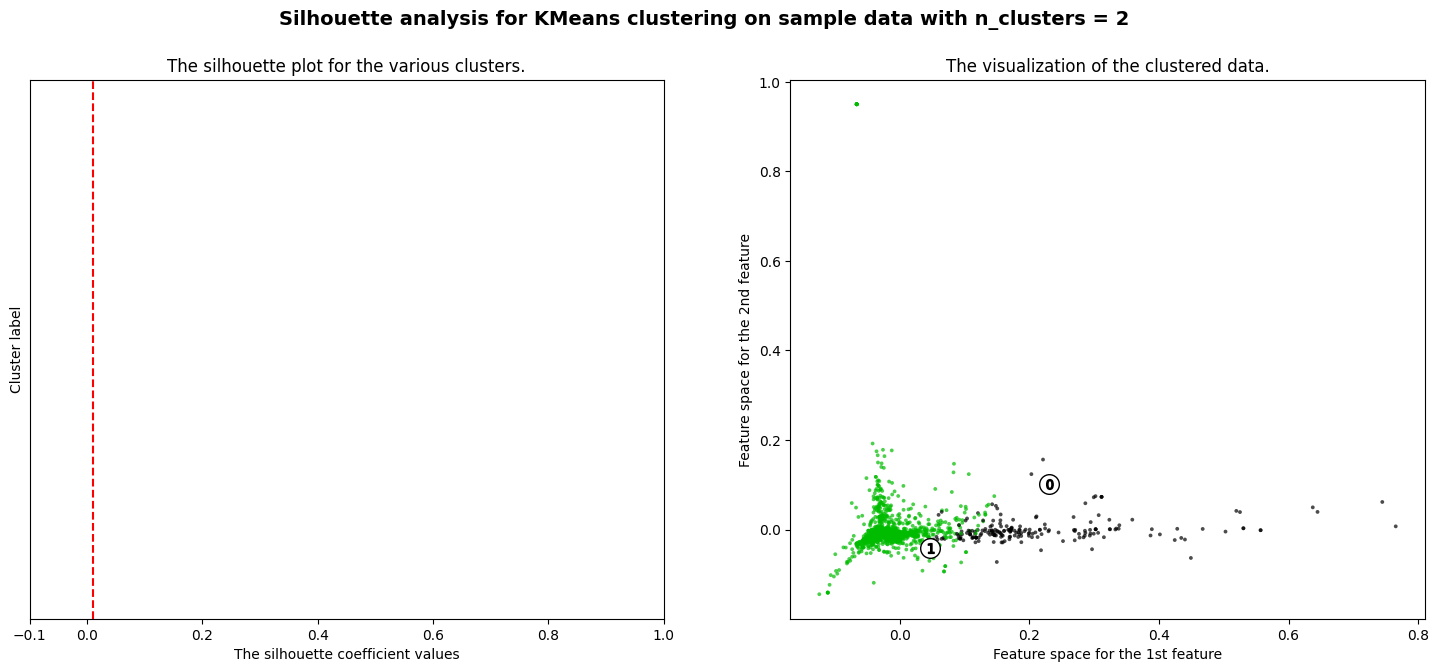

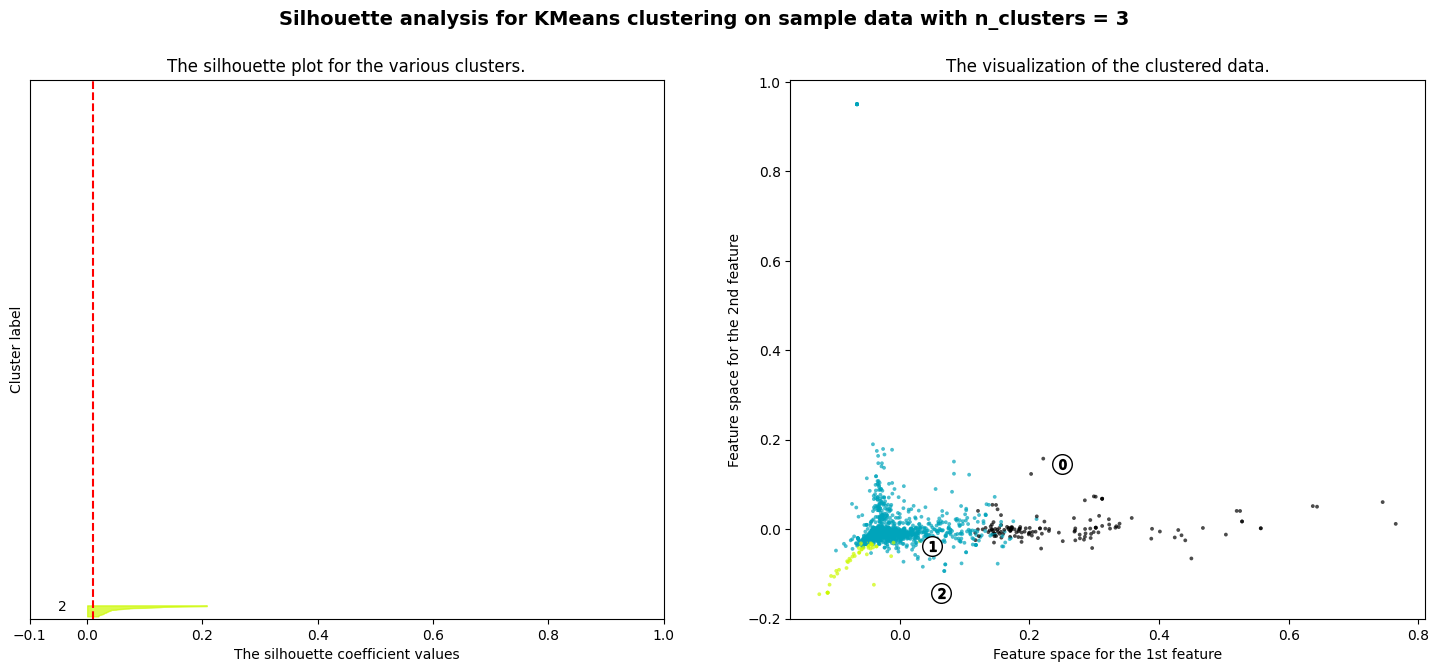

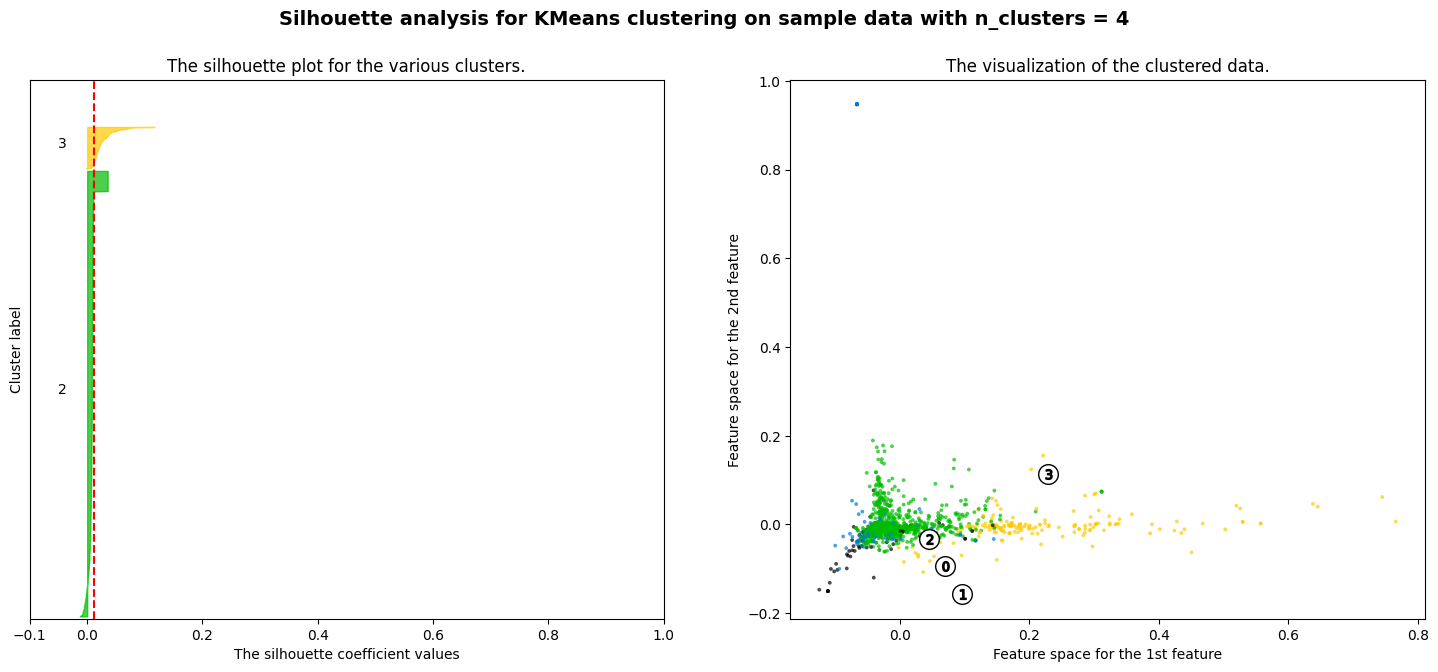

In [52]:
poet_society(News_Vectorized_LSA,2,4)

In [53]:
# Perform K-means Clustering

n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters, n_init=1, random_state=10)

kmeans.fit(News_Vectorized_LSA)



KMeans(n_clusters=4, n_init=1, random_state=10)

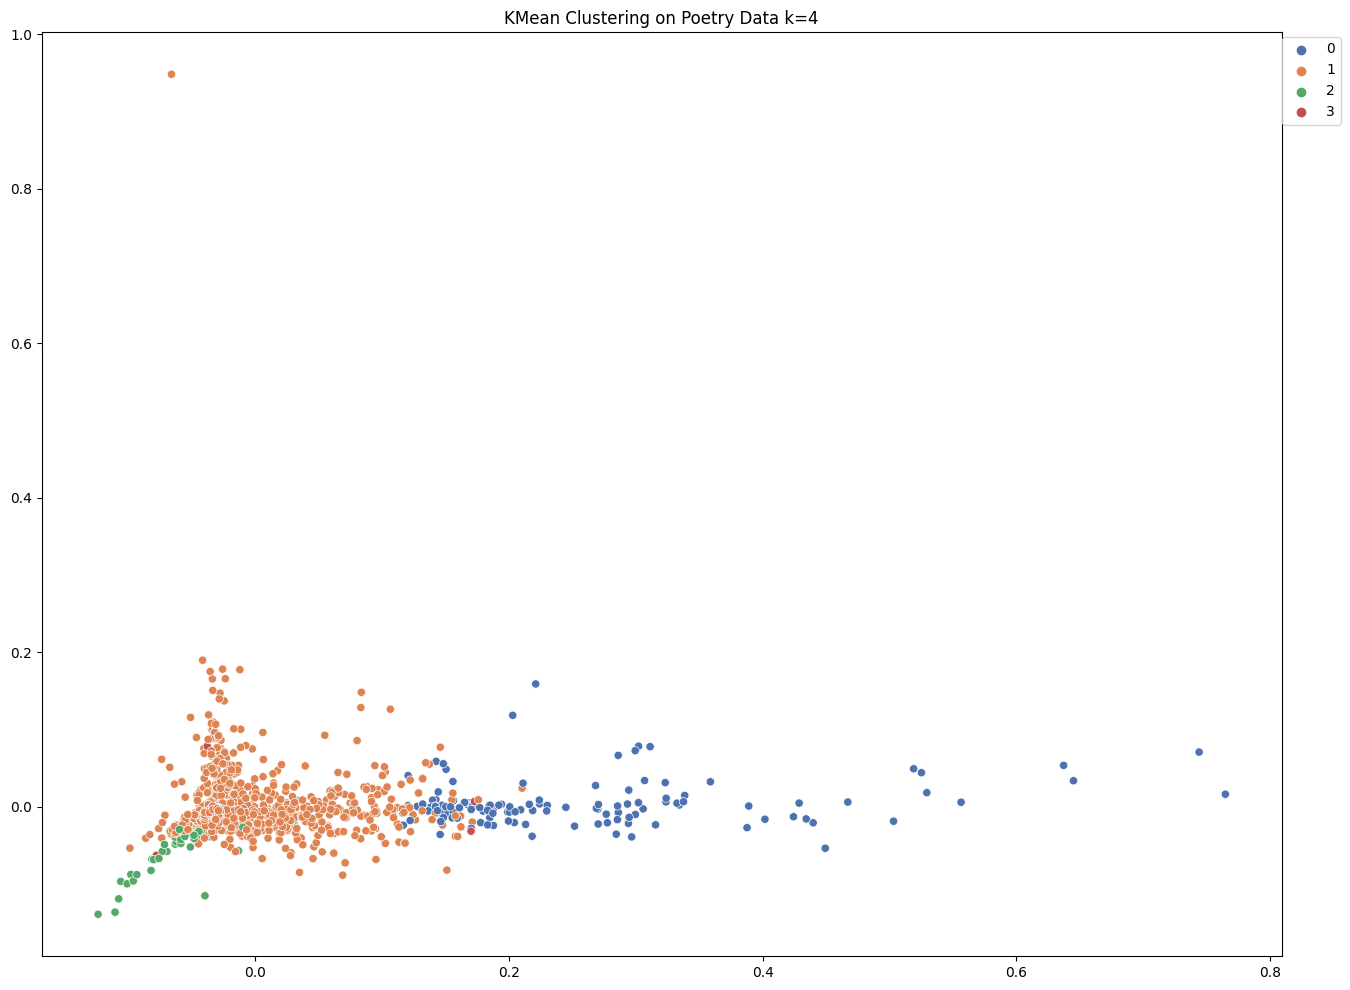

In [54]:
# Plot Features

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

df_text_final.loc[:,"Type"] = kmeans.labels_

pca = PCA(n_components=2)

reduced_news = pca.fit_transform(News_Vectorized_LSA)


plt.figure(figsize=(16, 12))

scatterplot = sns.scatterplot(x= reduced_news[:,0],y= reduced_news[:,1],palette='deep', hue = kmeans.labels_)


colours = sns.color_palette("deep", n_colors=len(np.unique(kmeans.labels_)))


plt.title('KMean Clustering on Poetry Data k=4')
plt.legend(loc=(1, 0.9))


plt.show()

In [55]:
# Assigning the function
#Setting max feature will reduce the vocab to 2000 features
# does this by term frequency - reduces dimensionality
vectorizer = CountVectorizer(max_features=1000)

In [56]:
# Getting our variables from our finalized data
X = df_text_final['text finalized']
y = df_text_final['Type']

In [57]:
# Transforming our independent variables
X = vectorizer.fit_transform(X)

In [58]:
# Getting the data for our train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Linear Regression Model

In [59]:
# Computing a linear regression model on the train data
reg_model = LinearRegression().fit(X_train, y_train)

In [60]:
# Obtaining the variance
reg_model.score(X_train, y_train)

0.9462551683419651

Logistic Regression Model

In [61]:
# Applying a logistic model on the train data
log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [62]:
# Getting our pred values
preds = log_model.predict(X_test)

In [63]:
# Viewing our report
print("Here is our classification report")
print('where 1 is earthquake, 2 is floods')
print('where 3 is wildfire and 4 is storm')
print(classification_report(y_test,preds))

Here is our classification report
where 1 is earthquake, 2 is floods
where 3 is wildfire and 4 is storm
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.98      0.98      0.98       405
           2       0.88      0.78      0.82         9
           3       1.00      1.00      1.00         3

    accuracy                           0.97       444
   macro avg       0.91      0.89      0.90       444
weighted avg       0.97      0.97      0.97       444



1 is earthquake
2 is flood
3 is wildifre
4 is storm

SVC Model

In [64]:
#sing SVC
from sklearn.svm import SVC

In [65]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [66]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [67]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.902 total time=   0.3s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.3s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.907 total time=   0.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.904 total time=   0.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.904 total time=   0.3s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.902 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.907 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.907 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.904 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.901 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.902 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [68]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [69]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [70]:
grid_predictions = grid.predict(X_test)

In [71]:
print("Here is our classification report")
print('where 1 is earthquake, 2 is floods')
print('where 3 is wildfire and 4 is storm')
print(classification_report(y_test,grid_predictions))

Here is our classification report
where 1 is earthquake, 2 is floods
where 3 is wildfire and 4 is storm
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.99      0.98      0.99       405
           2       0.73      0.89      0.80         9
           3       1.00      1.00      1.00         3

    accuracy                           0.97       444
   macro avg       0.89      0.94      0.91       444
weighted avg       0.97      0.97      0.97       444



BaggingClassifier

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
bagging_pred = model.predict(X_test)

In [73]:
print("Here is our classification report")
print('where 1 is earthquake, 2 is floods')
print('where 3 is wildfire and 4 is storm')
print(classification_report(y_test,bagging_pred))

Here is our classification report
where 1 is earthquake, 2 is floods
where 3 is wildfire and 4 is storm
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        27
           1       0.99      0.95      0.97       405
           2       0.67      0.89      0.76         9
           3       1.00      1.00      1.00         3

    accuracy                           0.95       444
   macro avg       0.82      0.95      0.87       444
weighted avg       0.97      0.95      0.95       444



AdaBoostClassifier  Model

In [74]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9572072072072072

In [75]:
boost_pred = model.predict(X_test)

In [76]:
print("Here is our classification report")
print('where 1 is earthquake, 2 is floods')
print('where 3 is wildfire and 4 is storm')
print(classification_report(y_test,boost_pred))

Here is our classification report
where 1 is earthquake, 2 is floods
where 3 is wildfire and 4 is storm
              precision    recall  f1-score   support

           0       0.68      0.96      0.80        27
           1       0.98      0.97      0.98       405
           2       0.80      0.44      0.57         9
           3       1.00      1.00      1.00         3

    accuracy                           0.96       444
   macro avg       0.87      0.84      0.84       444
weighted avg       0.96      0.96      0.96       444



GradientBoostingClassifier Model

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9684684684684685

In [78]:
grad_boost_pred = model.predict(X_test)

In [79]:
print("Here is our classification report")
print('where 1 is earthquake, 2 is floods')
print('where 3 is wildfire and 4 is storm')
print(classification_report(y_test,grad_boost_pred))

Here is our classification report
where 1 is earthquake, 2 is floods
where 3 is wildfire and 4 is storm
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.99      0.98      0.98       405
           2       0.86      0.67      0.75         9
           3       1.00      0.67      0.80         3

    accuracy                           0.97       444
   macro avg       0.90      0.81      0.84       444
weighted avg       0.97      0.97      0.97       444



RandomForestClassifier Model

In [80]:
#Used RFC
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [81]:
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.9662162162162162

In [82]:
from sklearn.metrics import classification_report
print('Here is our RandomForestClassifier report')
print('where 1 is earthquake, 2 is floods')
print('where 3 is wildfire and 4 is storm')
print(classification_report(y_test, y_pred))

Here is our RandomForestClassifier report
where 1 is earthquake, 2 is floods
where 3 is wildfire and 4 is storm
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        27
           1       0.99      0.97      0.98       405
           2       0.67      0.89      0.76         9
           3       1.00      0.33      0.50         3

    accuracy                           0.97       444
   macro avg       0.86      0.79      0.77       444
weighted avg       0.97      0.97      0.97       444



### Comparing news report on natural disaster vs regular news
where regular news will be 0
and natural disaster news will be 1

In [83]:
df_text_final_1 = df_text_final
df_text_final_1 = df_text_final_1.replace({'Type': {1:1, 2: 1, 3:1 , 4:1}})
df_text_final_1.head()

text finalized  Type
0  drama queen venice throughout storm glad power...     1
1                     hope republicans harmed affect     1
2                                cnn fake news strik     1
3                               cnn liberals fox new     1
4  bullsht news guy casually walking car inthe ba...     1

In [84]:
df_rand_final.head()

text finalized  Type
0                             chance overthrow putin     0
1  hear talks bush amp blair charged credit goes ...     0
2                          shitting pants whole hour     0
3                                       likely excit     0
4  putin saw video pregozhin stating brquot new r...     0

In [85]:
dfs = [df_text_final_1,df_rand_final]
df_reg_disas = pd.concat(dfs)
df_reg_disas

text finalized  Type
0     drama queen venice throughout storm glad power...     1
1                        hope republicans harmed affect     1
2                                   cnn fake news strik     1
3                                  cnn liberals fox new     1
4     bullsht news guy casually walking car inthe ba...     1
...                                                 ...   ...
1392   sad see quotmostly peacefulquot coup taking plac     0
1393                                       arrange fast     0
1394                     send russia destroying everyth     0
1395  means europe cannot take emigrants happy doesn...     0
1396                              populationrace replac     0

[3617 rows x 2 columns]

In [86]:
# Vectorize using Tfidf, use LSA to reduce feature, Normalize

pipeline = make_pipeline(TfidfVectorizer(), TruncatedSVD(n_components=1500,random_state=101))

News_Vectorized_LSA = pipeline.fit_transform(df_reg_disas['text finalized'])

explained_variance = pipeline[1].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 78.0%


For n_clusters = 2 The average silhouette_score is : 0.01190196213540182
For n_clusters = 3 The average silhouette_score is : 0.01056397405584591


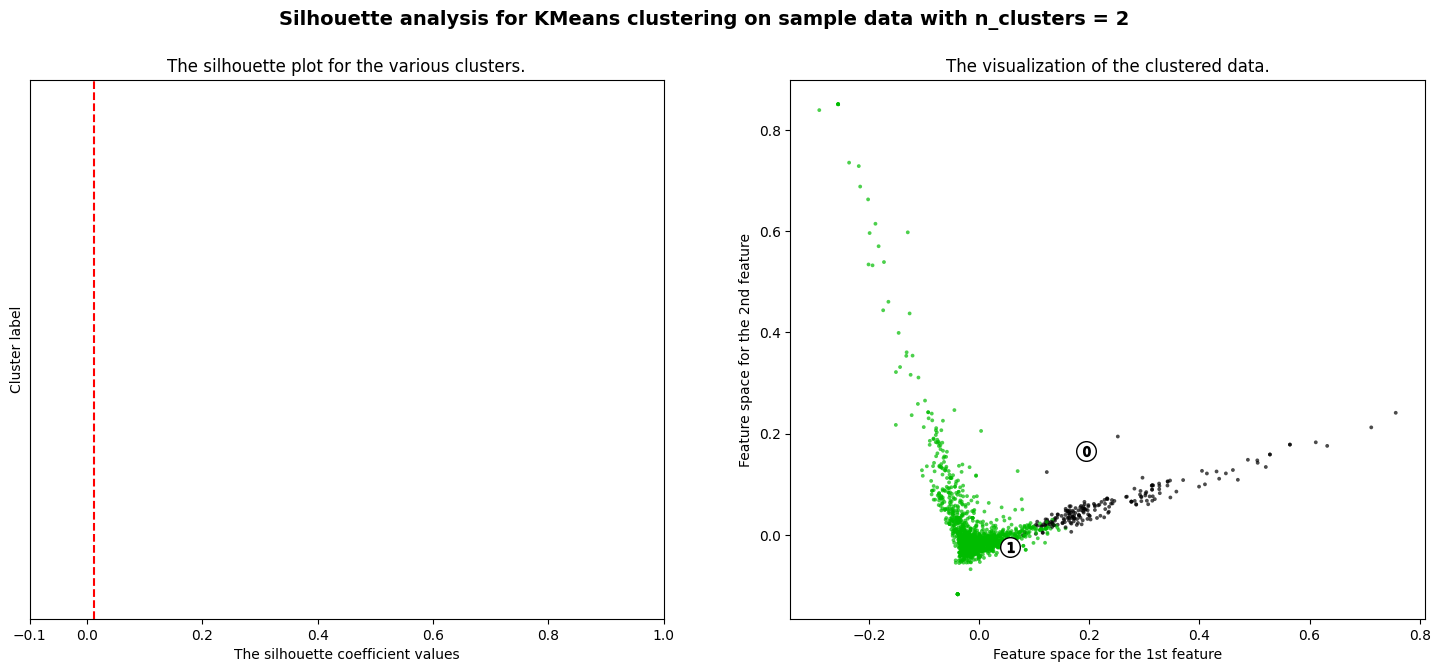

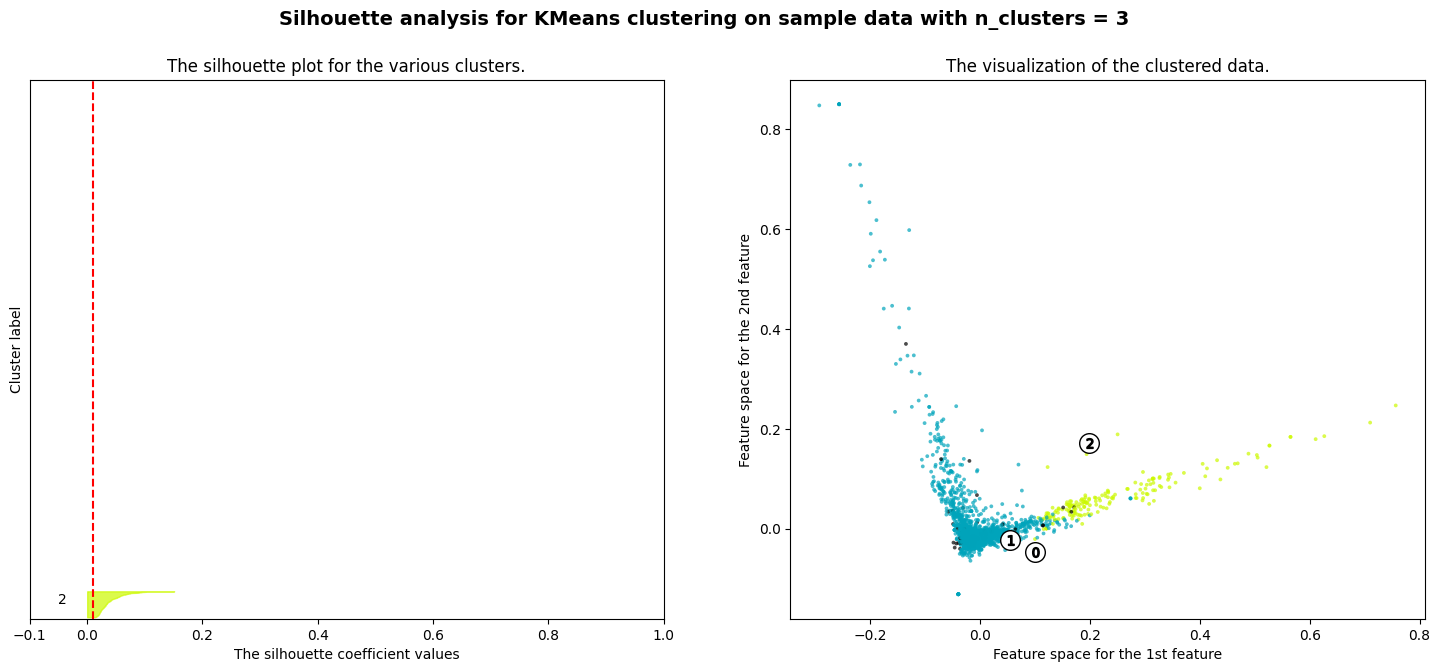

In [87]:
poet_society(News_Vectorized_LSA,2,3)

In [88]:
# Perform K-means Clustering

n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters, n_init=1, random_state=10)

kmeans.fit(News_Vectorized_LSA)

KMeans(n_clusters=2, n_init=1, random_state=10)

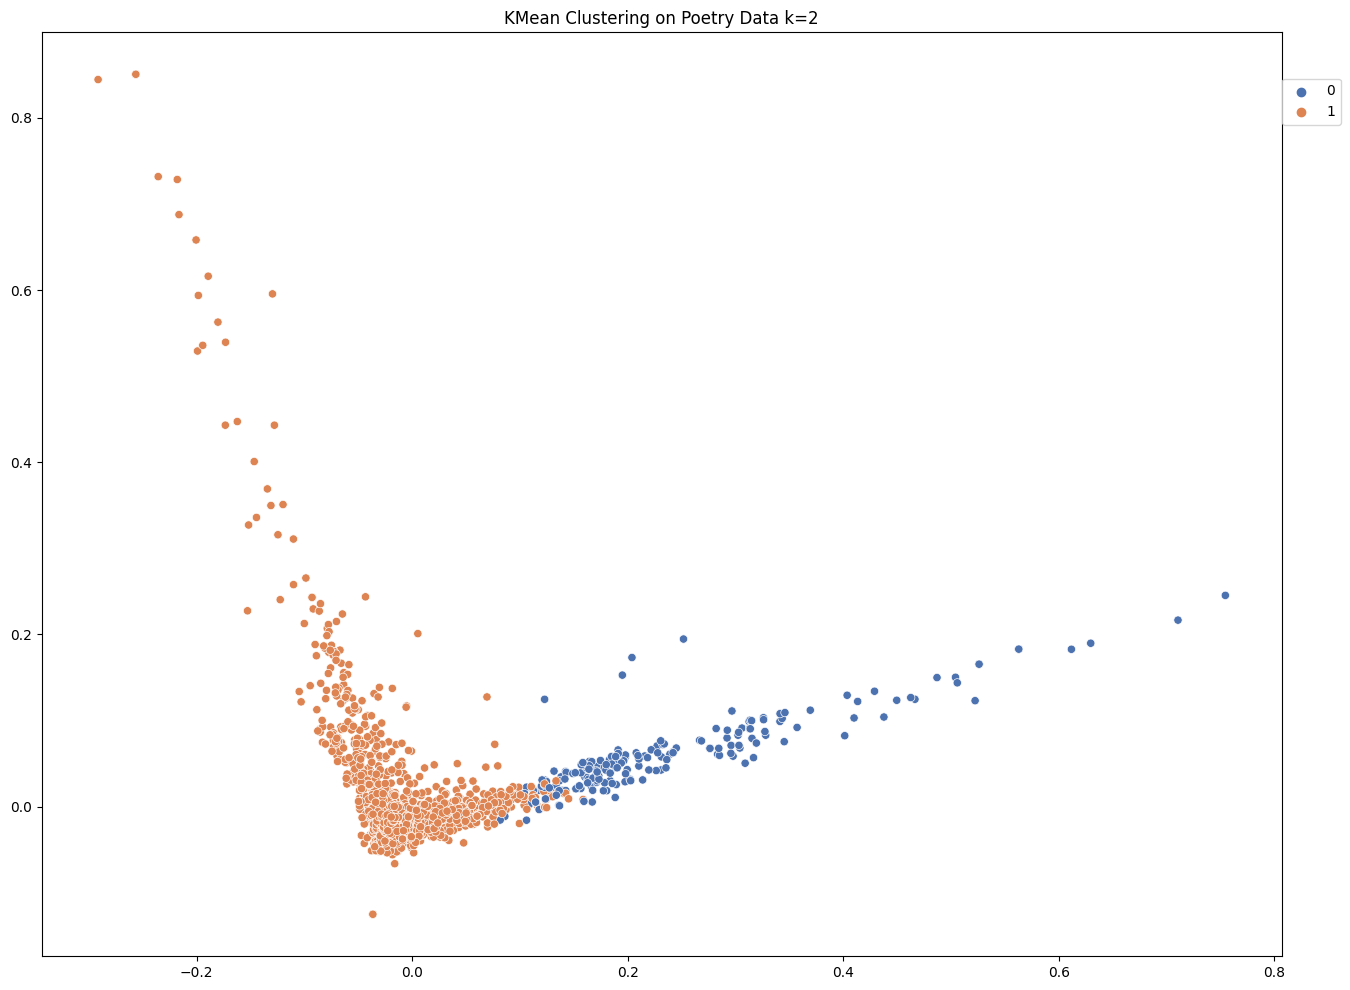

In [89]:
# Plot Features

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

df_reg_disas.loc[:,"Type"] = kmeans.labels_

pca = PCA(n_components=2)

reduced_news = pca.fit_transform(News_Vectorized_LSA)


plt.figure(figsize=(16, 12))

scatterplot = sns.scatterplot(x= reduced_news[:,0],y= reduced_news[:,1],palette='deep', hue = kmeans.labels_)


colours = sns.color_palette("deep", n_colors=len(np.unique(kmeans.labels_)))


plt.title('KMean Clustering on Poetry Data k=2')
plt.legend(loc=(1, 0.9))


plt.show()

In [90]:
# Getting our variables from our finalized data
X = df_reg_disas['text finalized']
y = df_reg_disas['Type']

# Transforming our independent variables
X = vectorizer.fit_transform(X)

# Getting the data for our train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Computing a linear regression model on the train data
reg_model = LinearRegression().fit(X_train, y_train)

# Obtaining the variance
reg_model.score(X_train, y_train)



0.8495289146599978

In [91]:
# Applying a logistic model on the train data
log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)

# Getting our pred values
preds = log_model.predict(X_test)


# Viewing our report
print("Here is our classification report")
print("where 0 is regular news and 1 is natural disaster")
print(classification_report(y_test,preds))

Here is our classification report
where 0 is regular news and 1 is natural disaster
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       1.00      0.99      0.99       687

    accuracy                           0.99       724
   macro avg       0.93      0.97      0.95       724
weighted avg       0.99      0.99      0.99       724

